In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import os

In [3]:
# Read the dataset
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df_new = data['BloodPressure']
df_new


0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64

In [6]:
mu, std = df_new.mean(),df_new.std()
print(f'{mu},{std}')

69.10546875,19.355807170644777


In [7]:
z_score = (df_new - mu)/std
z_score

0      0.149543
1     -0.160441
2     -0.263769
3     -0.160441
4     -1.503707
         ...   
763    0.356200
764    0.046215
765    0.149543
766   -0.470426
767    0.046215
Name: BloodPressure, Length: 768, dtype: float64

(array([0.00747097, 0.        , 0.        , 0.00021346, 0.00042691,
        0.        , 0.00042691, 0.00234802, 0.00747097, 0.01536885,
        0.02454747, 0.03116462, 0.0307377 , 0.02113217, 0.01451503,
        0.00405567, 0.00149419, 0.00149419, 0.00085383, 0.00021346]),
 array([  0. ,   6.1,  12.2,  18.3,  24.4,  30.5,  36.6,  42.7,  48.8,
         54.9,  61. ,  67.1,  73.2,  79.3,  85.4,  91.5,  97.6, 103.7,
        109.8, 115.9, 122. ]),
 <BarContainer object of 20 artists>)

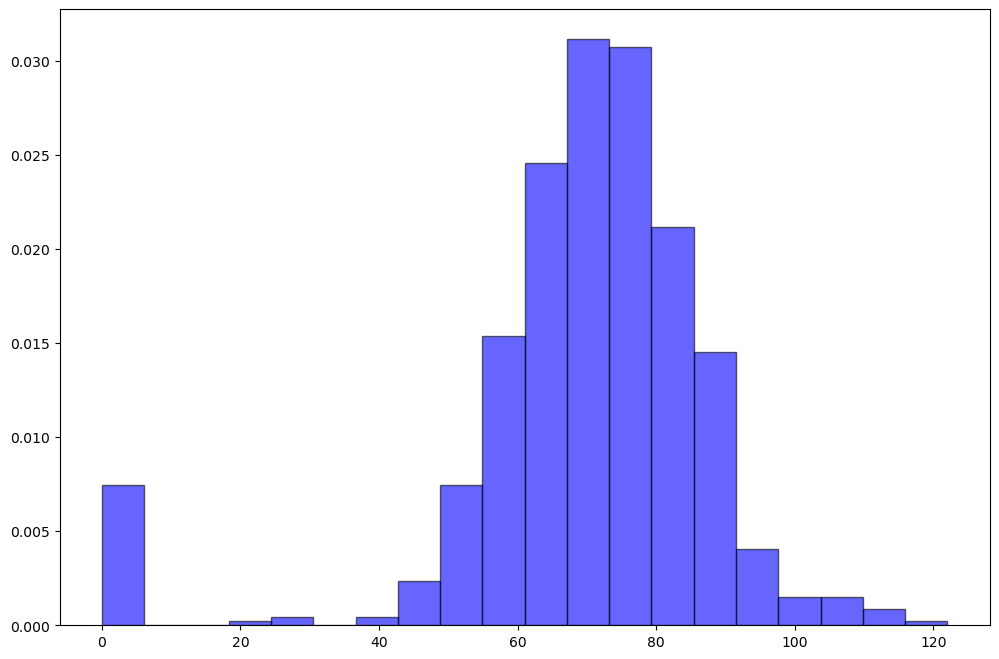

In [15]:
plt.figure(figsize=(12,8))
plt.hist(df_new,bins=20,density=True,alpha=0.6,color='b',edgecolor='black')

(array([0.00747097, 0.        , 0.        , 0.00021346, 0.00042691,
        0.        , 0.00042691, 0.00234802, 0.00747097, 0.01536885,
        0.02454747, 0.03116462, 0.0307377 , 0.02113217, 0.01451503,
        0.00405567, 0.00149419, 0.00149419, 0.00085383, 0.00021346]),
 array([  0. ,   6.1,  12.2,  18.3,  24.4,  30.5,  36.6,  42.7,  48.8,
         54.9,  61. ,  67.1,  73.2,  79.3,  85.4,  91.5,  97.6, 103.7,
        109.8, 115.9, 122. ]),
 <BarContainer object of 20 artists>)

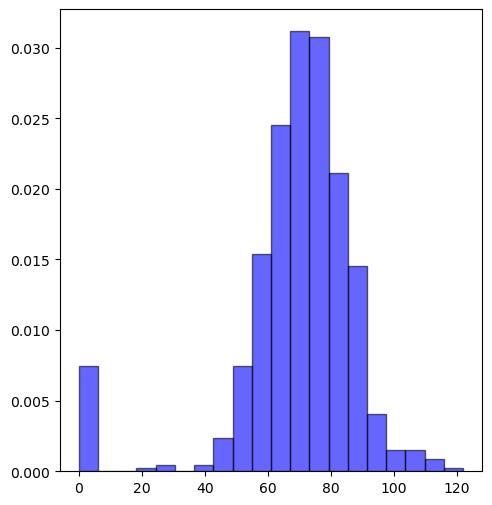

In [12]:
# Plot normal distribution graph of BloodPressure
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df_new, bins=20, density=True, alpha=0.6, color='b', edgecolor='black')

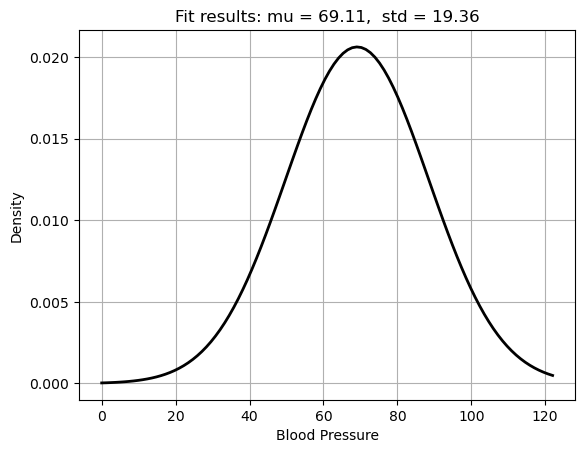

In [21]:
#Normal Distribution Function

# Fit a normal distribution to the data
x = np.linspace(df_new.min(), df_new.max(), 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.grid(True)

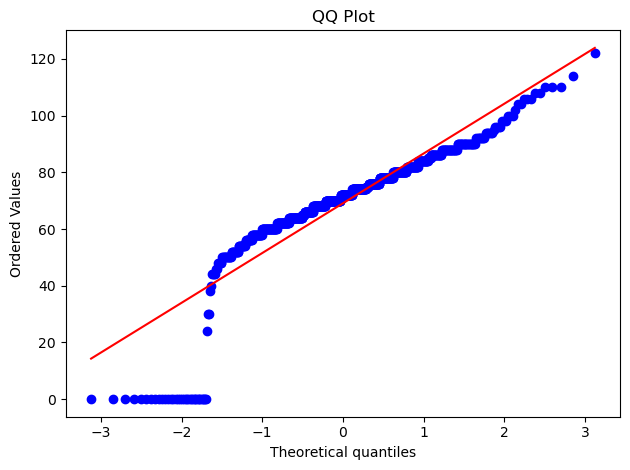

In [26]:
# QQ Plot

stats.probplot(df_new, dist="norm", plot=plt)
plt.title('QQ Plot')

plt.tight_layout()
plt.show()

(array([0.00747097, 0.        , 0.        , 0.00021346, 0.00042691,
        0.        , 0.00042691, 0.00234802, 0.00747097, 0.01536885,
        0.02454747, 0.03116462, 0.0307377 , 0.02113217, 0.01451503,
        0.00405567, 0.00149419, 0.00149419, 0.00085383, 0.00021346]),
 array([  0. ,   6.1,  12.2,  18.3,  24.4,  30.5,  36.6,  42.7,  48.8,
         54.9,  61. ,  67.1,  73.2,  79.3,  85.4,  91.5,  97.6, 103.7,
        109.8, 115.9, 122. ]),
 <BarContainer object of 20 artists>)

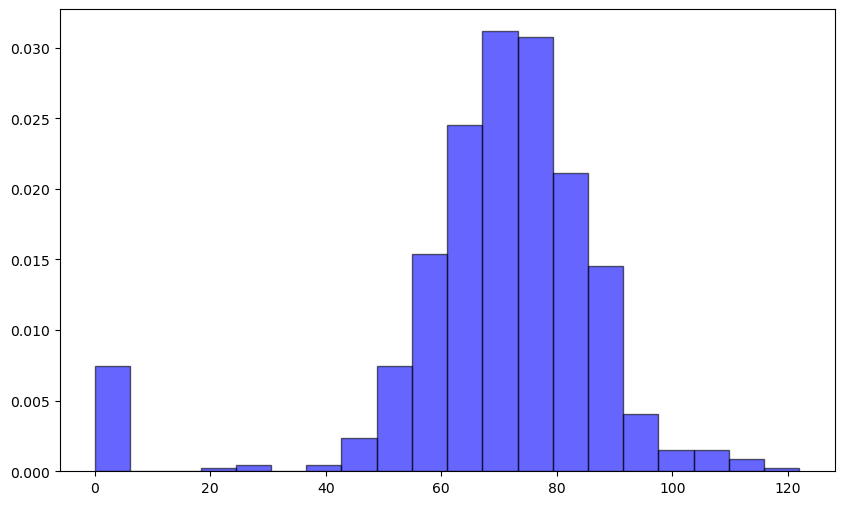

In [30]:
# Plot graph showing mean +- 3 SD
plt.figure(figsize=(10, 6))
plt.hist(df_new, bins=20, density=True, alpha=0.6, color='b', edgecolor='black')